In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scikitplot.metrics import plot_roc
from sklearn.neural_network import MLPClassifier, MLPRegressor
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from imblearn.under_sampling import TomekLinks, EditedNearestNeighbours
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import logging

In [2]:
df = np.load('df_dropped.npy', allow_pickle=True)
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)
df = pd.DataFrame(df)
df = df.rename(columns={0:'id', 1:'name', 2:'duration_ms', 3:'explicit', 4:'popularity', 5:'artists',
                        6:'danceability', 7:'energy', 8:'loudness', 9:'speechiness', 10:'acousticness',
                        11:'instrumentalness', 12:'valence', 13:'tempo', 14:'genre', 15:'year'})      
df = df.drop_duplicates(subset=['id'], keep='last')
X = df.drop(['genre', 'id', 'name', 'artists', 'explicit'], axis=1)
y = df['genre']
scaler = StandardScaler()
scaler.fit(X)
X_norm =  scaler.transform(X)
X_norm = pd.DataFrame(X_norm)
X_norm = X_norm.rename(columns={0:'duration_ms', 1:'popularity', 2:'danceability', 3:'energy', 4:'loudness', 
                        5:'speechiness', 6:'acousticness', 7:'instrumentalness', 8:'valence', 9:'tempo',
                        10:'year'})
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.1, random_state=100, stratify=y)

In [3]:
sm = SMOTE(random_state=13)
X_sm, y_sm = sm.fit_resample(X_train, y_train)

## GENRE without resampling

In [22]:
%%time

hidden_layer_sizes = (325, 325)
#alpha = [1.1, 2, 0.057, 0.058, 0.059, 0.061, 0.062, 0.063]

#for i in range(len(hidden_layer_sizes)):
clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, #alpha=alpha[i], 
                        learning_rate='adaptive', solver='adam', activation='relu',
                        early_stopping=True, random_state=19, max_iter=500)
    #clf.fit(X_train, y_train)
print('Cross-validation score: %s' % np.mean(cross_val_score(clf, X_train, y_train, cv=10, n_jobs=10)))

Cross-validation score: 0.38090669070176136
CPU times: total: 125 ms
Wall time: 2min 13s


(190, 190, 190, 190) = 0. 402 679 568 291 775 2   ->  0. 384 380 520 676 245 56   -> 0. 400 133 973 428 603 35
(217, 217, 216) 0.06 = 0. 400 942 811 065 624 6   ->  0. 386 477 090 165 158 1    -> 0. 405 827 844 144 244 7
(217, 217, 216) 0.058= 0. ??? ??? ??? ??? ??? ?   ->  0. 386 650 818 218 281 6    -> 0. 
(217, 217, 216) 0.059= 0. ??? ??? ??? ??? ??? ?   ->  0. 387 481 919 039 778 3    -> 0. 

In [50]:
%%time
#each takes 5 mins

hidden_layer_sizes = [(200, 200, 200, 50), (190, 190, 190, 80)]
#beta = [1/2, 1/3, 1/4, 1/5, 1/6, 1/7, 1/8, 1/9, 1/10]
#alpha = 0.07

for i in range(len(hidden_layer_sizes)):
    clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes[i], #alpha=alpha,
                        learning_rate='adaptive', solver='adam',
                        activation='relu', early_stopping=True,
                        random_state=19, max_iter=500)

    clf.fit(X_train, y_train)
#    y_pred = clf.predict(X_test)
    
    print('hidden_layer_sizes = ', hidden_layer_sizes[i], ':')
    print('best validation score: ', clf.best_validation_score_)

#print('Accuracy %s' % accuracy_score(y_test, y_pred))
#print('F1-score %s' % f1_score(y_test, y_pred, average=None))
#print(classification_report(y_test, y_pred))

hidden_layer_sizes =  (200, 200, 200, 50) :
best validation score:  0.3817144274903858
hidden_layer_sizes =  (190, 190, 190, 80) :
best validation score:  0.3823346979282967
CPU times: total: 2min 16s
Wall time: 3min 40s


In [8]:
%%time
#each takes 5 mins

hidden_layer_sizes = (190, 190, 190, 190)
alpha = 0.07
states = [13, 11, 1997, 19, 97, 30, 9, 14, 3, 1995, 95, 4, 1956, 56, 5, 8, 1958, 58]

for j in range(len(states)):
    clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, alpha=alpha,
                        learning_rate='adaptive', solver='adam',
                        activation='relu', early_stopping=True,
                        random_state=states[j], max_iter=500)

    clf.fit(X_train, y_train)
#    y_pred = clf.predict(X_test)
    
    print('states = ', states[j], ':')
    print('best validation score: ', clf.best_validation_score_)

#print('Accuracy %s' % accuracy_score(y_test, y_pred))
#print('F1-score %s' % f1_score(y_test, y_pred, average=None))
#print(classification_report(y_test, y_pred))

states =  13 :
best validation score:  0.3984617293139809
states =  11 :
best validation score:  0.3887855104825704
states =  1997 :
best validation score:  0.3923830790224538
states =  19 :
best validation score:  0.40851011040813795
states =  97 :
best validation score:  0.3889095645701526
states =  30 :
best validation score:  0.38655253690609104
states =  9 :
best validation score:  0.39374767398585786
states =  14 :
best validation score:  0.3864284828185089
states =  3 :
best validation score:  0.39449199851135097
states =  1995 :
best validation score:  0.38828929413224167
states =  95 :
best validation score:  0.39771740478848777
states =  4 :
best validation score:  0.39784145887607
states =  1956 :
best validation score:  0.392507133110036
states =  56 :
best validation score:  0.3933755117231113
states =  5 :
best validation score:  0.38816524004465947
states =  8 :
best validation score:  0.39895794566430964
states =  1958 :
best validation score:  0.39349956581069345
state

(190, 190, 190, 190) : 0. 410 246 867 634 288 5   (0.07)
(190, 190, 190, 190) : 0. 409 130 380 846 048 86  (0.1 )
(256, 256, 256, 160) : 0. 407 393 623 619 898 3

In [15]:
%%time
hidden_layer_sizes = (217, 217, 216)

clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, alpha=0.06,
                    learning_rate='adaptive', solver='adam',
                    activation='relu', early_stopping=True,
                    random_state=19, max_iter=500)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.4058278441442447
F1-score [0.23899371 0.36097561 0.03448276 0.14814815 0.36781609 0.28
 0.52252252 0.47286822 0.32653061 0.1        0.44210526 0.17142857
 0.3699422  0.51231527 0.5        0.28426396 0.70769231 0.33160622
 0.92227979 0.41732283 0.33103448 0.16129032 0.31067961 0.2
 0.52941176 0.27906977 0.36923077 0.52380952 0.26737968 0.05128205
 0.10909091 0.22       0.05825243 0.16071429 0.12962963 0.50574713
 0.21390374 0.48780488 0.29230769 0.37313433 0.34285714 0.12080537
 0.84729064 0.21818182 0.34939759 0.38423645 0.46666667 0.17391304
 0.3190184  0.55789474 0.32635983 0.38596491 0.71823204 0.5
 0.3908046  0.20289855 0.17073171 0.         0.32835821 0.66666667
 0.49541284 0.55045872 0.16       0.17391304 0.63235294 0.35502959
 0.54054054 0.16438356 0.49107143 0.15706806 0.37362637 0.33846154
 0.40613027 0.53211009 0.13986014 0.57894737 0.41509434 0.54393305
 0.47257384 0.45283019 0.33333333 0.45205479 0.40522876 0.37668161
 0.40677966 0.25252525 0.         0.23076923 

C:\Users\Utente\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Utente\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Utente\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [74]:
hidden_layer_sizes = (217, 217, 216)

clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, alpha=0.06,
                    learning_rate='adaptive', solver='adam',
                    activation='relu', early_stopping=True,
                    random_state=19, max_iter=500)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)

print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))

Accuracy 0.4668320823770238
F1-score [0.25641026 0.40987124 0.11895911 0.31896552 0.46376812 0.36244541
 0.60479042 0.49826087 0.35904255 0.24938875 0.52283985 0.2218845
 0.40190817 0.59675676 0.54642857 0.37627119 0.74324324 0.4028691
 0.86568915 0.44950849 0.41781874 0.27803522 0.41219769 0.29953917
 0.6160568  0.33115061 0.45891662 0.62540717 0.38143675 0.2122905
 0.20164609 0.36767677 0.12849741 0.27973568 0.2238193  0.58616188
 0.33667781 0.48770204 0.32104832 0.34078212 0.43782654 0.1897702
 0.86004274 0.3172147  0.3583278  0.51556526 0.59300699 0.29012346
 0.45423729 0.64907355 0.41203282 0.44425532 0.75399754 0.32682927
 0.50608584 0.32267038 0.26990553 0.03649635 0.35353535 0.74936709
 0.5095264  0.61919192 0.25914634 0.29685535 0.65391015 0.42821782
 0.65914787 0.28521739 0.54874372 0.25506294 0.34922601 0.41616509
 0.43602629 0.59412955 0.23816794 0.63614164 0.5218543  0.5772682
 0.52376837 0.52040134 0.41986234 0.50293255 0.41606887 0.42604745
 0.46153846 0.28888889 0.00653

0.9471817724241207


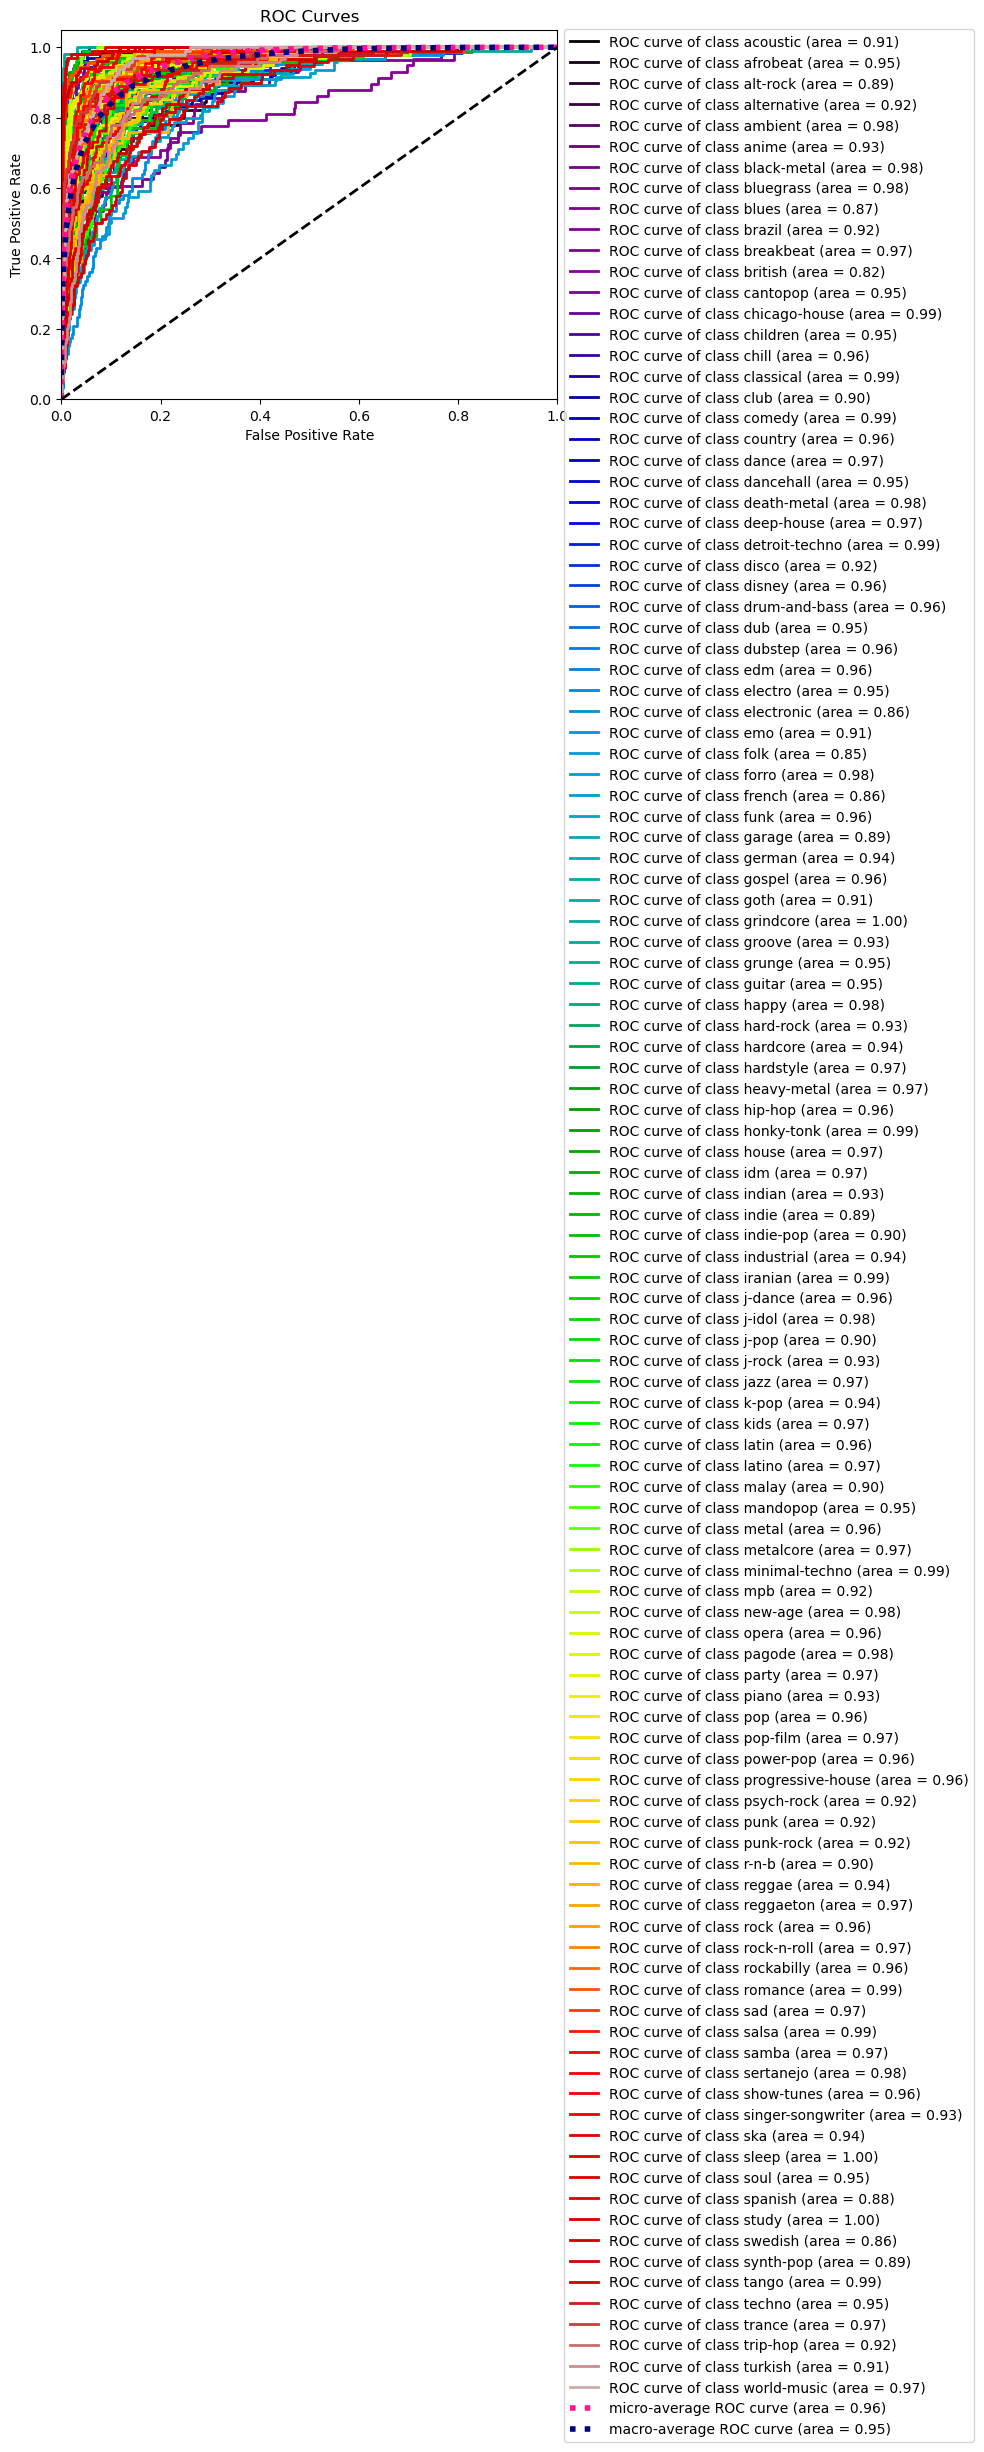

In [41]:
plot_roc(y_test, clf.predict_proba(X_test))


print(roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr", average="macro"))
figsize=(14,12)
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

In [16]:
roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr", average="macro")

0.9471817724241207

## GENRE with SMOTE

In [60]:
X_sm.describe()

,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,year
count,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000,101700.000000
mean,-0.011600,0.035679,0.041751,0.024718,0.050463,-0.014266,-0.041214,-0.057268,0.023756,0.000670,0.036885
std,0.946908,1.030560,0.977713,0.968244,0.955905,0.944881,0.972949,0.955120,0.982342,0.982464,0.979578
min,-2.161374,-1.461489,-3.180122,-2.471680,-7.852902,-0.771825,-0.969540,-0.535927,-1.785277,-4.052735,-9.834713
25%,-0.527751,-0.764617,-0.577568,-0.618594,-0.271575,-0.451599,-0.911022,-0.535927,-0.790614,-0.744777,-0.263283
50%,-0.156428,0.071630,0.122036,0.185163,0.293789,-0.336918,-0.461204,-0.535752,-0.013094,-0.001764,0.426550
75%,0.314989,0.814960,0.763312,0.835641,0.662605,-0.020635,0.773575,-0.398898,0.815952,0.597195,0.685237
max,38.246058,2.952036,2.392737,1.423984,2.494438,7.741060,1.974081,2.550318,1.998675,4.027627,0.857696


In [67]:
for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    print(int(101700/(124*i)))

820
410
273
205
164
136
117
102
91
82


In [9]:
%%time

hidden_layer_sizes = (274, 273, 273) 
alpha = [0.007, 0.008, 0.009, 0.011, 0.012, 0.013]

for i in range(len(alpha)):
    clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, alpha=alpha[i], 
                        learning_rate='adaptive', solver='adam', activation='relu',
                        early_stopping=True, random_state=19, max_iter=500)
    #clf.fit(X_train, y_train)
    print(alpha[i], 'Cross-validation score: %s' % np.mean(cross_val_score(clf, X_sm, y_sm, cv=10, n_jobs=10)))

0.007 Cross-validation score: 0.4616912487708948
0.008 Cross-validation score: 0.46200589970501477
0.009 Cross-validation score: 0.4604621435594887
0.011 Cross-validation score: 0.46589970501474925
0.012 Cross-validation score: 0.46059980334316614
0.013 Cross-validation score: 0.4621435594886922
CPU times: total: 1.17 s
Wall time: 1h 44min 47s


(274, 273, 273) 0.011 = 0. 465 899 705 014 749 25   -> 0. 
(274, 273, 273) 0.01  = 0. 462 782 694 198 623 4    -> 0. 
(274, 273, 273) 0.001 = 0. 462 261 553 588 987 2    -> 0. 

In [32]:
%%time
hidden_layer_sizes = (274, 273, 273)

clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, alpha=0.011,
                    learning_rate='adaptive', solver='adam',
                    activation='relu', early_stopping=True,
                    random_state=19, max_iter=500)

clf.fit(X_sm, y_sm)
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.37780506866138214
F1-score [0.17721519 0.34782609 0.17021277 0.27906977 0.37837838 0.26744186
 0.51578947 0.42857143 0.2972973  0.06060606 0.36781609 0.17777778
 0.30337079 0.5        0.42696629 0.33175355 0.65497076 0.28235294
 0.83902439 0.47953216 0.4        0.25136612 0.28571429 0.19834711
 0.47904192 0.28787879 0.39751553 0.50980392 0.24460432 0.09195402
 0.19354839 0.29931973 0.0620155  0.18791946 0.12631579 0.492891
 0.18181818 0.44444444 0.17391304 0.25396825 0.33846154 0.1734104
 0.85148515 0.25581395 0.30188679 0.4057971  0.52272727 0.10309278
 0.3125     0.5025641  0.33333333 0.34146341 0.67961165 0.45454545
 0.31638418 0.22413793 0.20224719 0.14492754 0.31884058 0.64864865
 0.41212121 0.54726368 0.15873016 0.21917808 0.69172932 0.31868132
 0.55276382 0.34862385 0.55614973 0.10322581 0.34319527 0.29139073
 0.39175258 0.51578947 0.09395973 0.57918552 0.43243243 0.49751244
 0.43801653 0.4        0.34285714 0.41726619 0.37569061 0.30578512
 0.34013605 0.21126761 0.08

In [37]:
clf.fit(X_sm, y_sm)
y_pred = clf.predict(X_sm)

print('Accuracy %s' % accuracy_score(y_sm, y_pred))
print('F1-score %s' % f1_score(y_sm, y_pred, average=None))
print(classification_report(y_sm, y_pred))

Accuracy 0.646007866273353
F1-score [0.37303088 0.55689565 0.68940189 0.92728267 0.64566929 0.57191011
 0.71864776 0.60664523 0.68193131 0.84361702 0.64414958 0.55703289
 0.54657746 0.67617295 0.64548287 0.49322211 0.80828402 0.52603471
 0.87369002 0.63115693 0.78973346 0.59413854 0.68167985 0.666313
 0.64993565 0.61059908 0.6441303  0.7076326  0.51600261 0.81041968
 0.82258065 0.60921248 0.33383459 0.58393352 0.52843772 0.67682056
 0.39452844 0.63986784 0.52748538 0.58555133 0.53091684 0.39882698
 0.90400439 0.51044084 0.57217573 0.63310846 0.73160173 0.71113758
 0.62358277 0.71889889 0.51416309 0.72627537 0.82502651 0.85730337
 0.59900374 0.76995798 0.75542522 0.84417715 0.57067371 0.78483506
 0.5774744  0.72478992 0.73980309 0.66855257 0.86131387 0.57200606
 0.75658588 0.76328987 0.61802101 0.34668418 0.40969697 0.63283922
 0.55856833 0.68415301 0.36975945 0.7158984  0.64766525 0.61827676
 0.60170213 0.5948224  0.59651388 0.72304943 0.54800431 0.49306488
 0.60484848 0.43102265 0.722

# EXPLICIT

In [15]:
df2 = np.load('df_dropped.npy', allow_pickle=True)
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)
df2 = pd.DataFrame(df2)
df2 = df2.rename(columns={0:'id', 1:'name', 2:'duration_ms', 3:'explicit', 4:'popularity', 5:'artists',
                        6:'danceability', 7:'energy', 8:'loudness', 9:'speechiness', 10:'acousticness',
                        11:'instrumentalness', 12:'valence', 13:'tempo', 14:'genre', 15:'year'})     
df2 = df2.drop_duplicates(subset=['id'], keep='last')
X2 = df2.drop(['genre', 'id', 'name', 'artists', 'explicit', 'year'], axis=1)
y2 = df['explicit']
scaler = StandardScaler()
scaler.fit(X2)
X_norm2 =  scaler.transform(X2)
X_norm2 = pd.DataFrame(X_norm2)
X_norm2 = X_norm2.rename(columns={0:'duration_ms', 1:'popularity', 2:'danceability', 3:'energy', 4:'loudness', 
                        5:'speechiness', 6:'acousticness', 7:'instrumentalness', 8:'valence', 9:'tempo'})#,
                        #10:'year'})
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_norm2, y2, test_size=0.1, random_state=100, stratify=y2)

In [18]:
ada2 = ADASYN(random_state=13)
X_ada2, y_ada2 = ada2.fit_resample(X_train2, y_train2)

In [19]:
for i in y_ada2.index:
    if y_ada2[i] == False:
        y_ada2[i] = 'False'
    if y_ada2[i] == True:
        y_ada2[i] = 'True'

In [16]:
for i in y_test2.index:
    if y_test2[i] == False:
        y_test2[i] = 'False'
    if y_test2[i] == True:
        y_test2[i] = 'True'

In [17]:
for i in y_train2.index:
    if y_train2[i] == False:
        y_train2[i] = 'False'
    if y_train2[i] == True:
        y_train2[i] = 'True'

In [125]:
%%time
# under 1 minute each

hidden_layer_sizes = (128, 129, 65, 65)
alpha = 0.0078
states = [13, 11, 1997, 19, 97, 30, 9, 14, 3, 1995, 95, 4, 1956, 56, 5, 8, 1958, 58]

for i in range(len(states)):
    clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, alpha=alpha,
                        learning_rate='adaptive', solver='adam',
                        activation='relu', early_stopping=True,
                        random_state=states[i], max_iter=500)

    clf.fit(X_train2, y_train2)

    #y_pred2 = clf.predict(X_test2)
    
    print(states[i], ':')
    print(clf.best_validation_score_)

#print('Accuracy %s' % accuracy_score(y_test2, y_pred2))
#print('F1-score %s' % f1_score(y_test2, y_pred2, average=None))
#print(classification_report(y_test2, y_pred2))

13 :
0.9230864656990447
11 :
0.9203572757722367
1997 :
0.9214737625604764
19 :
0.9194888971591614
97 :
0.9219699789108051
30 :
0.9229624116114626
9 :
0.9208534921225654
14 :
0.9223421411735516
3 :
0.9184964644585039
1995 :
0.9203572757722367
95 :
0.9214737625604764
4 :
0.9229624116114626
1956 :
0.9218459248232229
56 :
0.921225654385312
5 :
0.9209775462101476
8 :
0.9213497084728942
1958 :
0.9196129512467436
58 :
0.9180002481081752
CPU times: user 18min 50s, sys: 1min 20s, total: 20min 11s
Wall time: 10min 11s


Dummy Classifier :     0. 913 155 132 757 196 2

(128, 129,  65,  65) : 0. 923 086 465 699 044 7   (0.0078)
(128, 129,  65,  65) : 0. 922 962 411 611 462 6   (0.008)
(128, 129,  65,  65) : 0. 922 714 303 436 298 2   (0.013)
(128, 129,  65,  65) : 0. 922 590 249 348 716     (0.007)
(128, 129,  65,  65) : 0. 922 094 032 998 387 3   (0.01)

In [20]:

%%time
hidden_layer_sizes = (128, 129, 65, 65)

clf2 = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, alpha=0.0078,
                    learning_rate='adaptive', solver='adam',
                    activation='relu', early_stopping=True,
                    random_state=19, max_iter=500)

clf2.fit(X_train2, y_train2)
y_pred2 = clf2.predict(X_test2)

print('Accuracy %s' % accuracy_score(y_test2, y_pred2))
print('F1-score %s' % f1_score(y_test2, y_pred2, average=None))
print(classification_report(y_test2, y_pred2))

Accuracy 0.9190577202188233
F1-score [0.95679638 0.36010591]
              precision    recall  f1-score   support

       False       0.93      0.98      0.96      8179
        True       0.57      0.26      0.36       778

    accuracy                           0.92      8957
   macro avg       0.75      0.62      0.66      8957
weighted avg       0.90      0.92      0.90      8957

CPU times: total: 29.4 s
Wall time: 41.5 s


In [21]:
clf2.fit(X_train2, y_train2)
y_pred2 = clf2.predict(X_train2)

print('Accuracy %s' % accuracy_score(y_train2, y_pred2))
print('F1-score %s' % f1_score(y_train2, y_pred2, average=None))
print(classification_report(y_train2, y_pred2))

Accuracy 0.9247689349295949
F1-score [0.95988357 0.39661692]
              precision    recall  f1-score   support

       False       0.94      0.99      0.96     73605
        True       0.65      0.28      0.40      7000

    accuracy                           0.92     80605
   macro avg       0.79      0.64      0.68     80605
weighted avg       0.91      0.92      0.91     80605



In [132]:
%%time
# 6 mins each

hidden_layer_sizes = (128, 128, 128, 128)
alpha = 0.0003

for i in range(len(alpha)):
    clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, alpha=alpha[i],
                        learning_rate='adaptive', solver='adam',
                        activation='relu', early_stopping=True,
                        random_state=13, max_iter=500)

    clf.fit(X_ada2, y_ada2)

    #y_pred2 = clf.predict(X_test2)
    
    print(alpha[i], ':')
    print(clf.best_validation_score_)

#print('Accuracy %s' % accuracy_score(y_test2, y_pred2))
#print('F1-score %s' % f1_score(y_test2, y_pred2, average=None))
#print(classification_report(y_test2, y_pred2))

0.00026 :
0.942961906701976
0.00027 :
0.9432335166700618
0.00028 :
0.9405853194812249
0.00029 :
0.9455422013987913
0.00031 :
0.9444557615264481
0.00032 :
0.9410606369253751
0.00033 :
0.9445915665104909
0.00034 :
0.9401100020370747
CPU times: user 1h 38min 14s, sys: 6min 9s, total: 1h 44min 23s
Wall time: 53min 11s


Dummy Classifier     : 0. 5

(128, 128, 128, 128) : 0. 947 307 666 191 349 2   (0.0003)
(128, 128, 128, 128) : 0. 945 542 201 398 791 3   (0.00029)
(128, 128, 128, 128) : 0. 944 455 761 526 448 1   (0.00031)

In [22]:
%%time
hidden_layer_sizes = (128, 128, 128, 128)

clf2 = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, alpha=0.0003,
                    learning_rate='adaptive', solver='adam',
                    activation='relu', early_stopping=True,
                    random_state=19, max_iter=500)

clf2.fit(X_ada2, y_ada2)
y_pred2 = clf2.predict(X_test2)

print('Accuracy %s' % accuracy_score(y_test2, y_pred2))
print('F1-score %s' % f1_score(y_test2, y_pred2, average=None))
print(classification_report(y_test2, y_pred2))

Accuracy 0.8616724349670649
F1-score [0.92180499 0.40115998]
              precision    recall  f1-score   support

       False       0.95      0.89      0.92      8179
        True       0.32      0.53      0.40       778

    accuracy                           0.86      8957
   macro avg       0.64      0.71      0.66      8957
weighted avg       0.90      0.86      0.88      8957

CPU times: total: 3min 40s
Wall time: 4min 45s


In [23]:
hidden_layer_sizes = (128, 128, 128, 128)

clf2 = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, alpha=0.0003, learning_rate='adaptive', solver='adam', activation='relu', early_stopping=True, random_state=19, max_iter=500)


clf2.fit(X_ada2, y_ada2)
y_pred2 = clf2.predict(X_train2)

print('Accuracy %s' % accuracy_score(y_train2, y_pred2))
print('F1-score %s' % f1_score(y_train2, y_pred2, average=None))
print(classification_report(y_train2, y_pred2))

Accuracy 0.9486136095775697
F1-score [0.97109923 0.76849989]
              precision    recall  f1-score   support

       False       1.00      0.95      0.97     73605
        True       0.63      0.98      0.77      7000

    accuracy                           0.95     80605
   macro avg       0.81      0.96      0.87     80605
weighted avg       0.97      0.95      0.95     80605



In [118]:
tl2 = TomekLinks()
X_tl2, y_tl2 = tl2.fit_resample(X_train2, y_train2)

In [119]:
for i in y_tl2.index:
    if y_tl2[i] == False:
        y_tl2[i] = 'False'
    if y_tl2[i] == True:
        y_tl2[i] = 'True'

In [131]:
%%time
hidden_layer_sizes = (13, 11, 19, 97)
alpha = [0.00001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.05, 0.06, 0.07, 0.08, 0.09,
        0.11, 0.12, 0.13, 0.14, 0.15]

for i in range(len(alpha)):
    clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, alpha=alpha[i],
                        learning_rate='adaptive', solver='adam',
                        activation='relu', early_stopping=True,
                        random_state=13, max_iter=500)

    clf.fit(X_tl2, y_tl2)

    #y_pred2 = clf.predict(X_test2)
    
    print(alpha[i], ':')
    print(clf.best_validation_score_)

#print('Accuracy %s' % accuracy_score(y_test2, y_pred2))
#print('F1-score %s' % f1_score(y_test2, y_pred2, average=None))
#print(classification_report(y_test2, y_pred2))

1e-05 :
0.9218096565707768
0.0002 :
0.9211760233177038
0.0003 :
0.9218096565707768
0.0004 :
0.9216829299201622
0.0005 :
0.9214294766189329
0.0006 :
0.9235838296793816
0.0007 :
0.9214294766189329
0.0008 :
0.9213027499683183
0.0009 :
0.9214294766189329
0.05 :
0.9207958433658598
0.06 :
0.9204156634140159
0.07 :
0.9207958433658598
0.08 :
0.9207958433658598
0.09 :
0.9206691167152452
0.11 :
0.9207958433658598
0.12 :
0.9209225700164745
0.13 :
0.9213027499683183
0.14 :
0.9214294766189329
0.15 :
0.9215562032695476
CPU times: user 7min 45s, sys: 43.5 s, total: 8min 29s
Wall time: 5min 5s


( 13,  11,   9,   7) : 0. 923 583 829 679 381 6   (0.0006)
( 13,  11,   9,   7) : 0. 923 203 649 727 537 7   (0.1)
( 13,  11,   9,   7) : 0. 923 076 923 076 923 1   (0.0001)


In [133]:
%%time
hidden_layer_sizes = (13, 11, 9, 7)

clf2 = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, alpha=0.0006,
                    learning_rate='adaptive', solver='adam',
                    activation='relu', early_stopping=True,
                    random_state=19, max_iter=500)

clf2.fit(X_tl2, y_tl2)
y_pred2 = clf2.predict(X_test2)

print('Accuracy %s' % accuracy_score(y_test2, y_pred2))
print('F1-score %s' % f1_score(y_test2, y_pred2, average=None))
print(classification_report(y_test2, y_pred2))

Accuracy 0.9199508764095121
F1-score [0.95755638 0.29774731]
              precision    recall  f1-score   support

       False       0.93      0.99      0.96      8179
        True       0.63      0.20      0.30       778

    accuracy                           0.92      8957
   macro avg       0.78      0.59      0.63      8957
weighted avg       0.90      0.92      0.90      8957

CPU times: user 7.65 s, sys: 338 ms, total: 7.99 s
Wall time: 5.91 s


In [141]:
clf2.fit(X_tl2, y_tl2)
y_pred2 = clf2.predict(X_train2)

print('Accuracy %s' % accuracy_score(y_train2, y_pred2))
print('F1-score %s' % f1_score(y_train2, y_pred2, average=None))
print(classification_report(y_train2, y_pred2))

Accuracy 0.924086595124372
F1-score [0.95967418 0.3539225 ]
              precision    recall  f1-score   support

       False       0.93      0.99      0.96     73605
        True       0.68      0.24      0.35      7000

    accuracy                           0.92     80605
   macro avg       0.81      0.61      0.66     80605
weighted avg       0.91      0.92      0.91     80605



# Regression

In [5]:
df = np.load('df_dropped.npy', allow_pickle=True)
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)
df = pd.DataFrame(df)
df = df.rename(columns={0:'id', 1:'name', 2:'duration_ms', 3:'explicit', 4:'popularity', 5:'artists',
                        6:'danceability', 7:'energy', 8:'loudness', 9:'speechiness', 10:'acousticness',
                        11:'instrumentalness', 12:'valence', 13:'tempo', 14:'genre', 15:'year'})      
df = df.drop_duplicates(subset=['id'], keep='last')
X_reg = df.drop(['genre', 'id', 'name', 'artists', 'explicit', 'energy'], axis=1)
y_reg = df['energy']
scaler = StandardScaler()
scaler.fit(X_reg)
X_norm_reg = scaler.transform(X_reg)
X_norm_reg = pd.DataFrame(X_norm_reg)
X_norm_reg = X_norm_reg.rename(columns={0:'duration_ms', 1:'popularity', 2:'danceability', 3:'loudness', 
                        4:'speechiness', 5:'acousticness', 6:'instrumentalness', 7:'valence', 8:'tempo',
                        9:'year'})
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_norm_reg, y_reg, test_size=0.1, random_state=100, stratify=y)

In [13]:
%%time

hidden_layer_sizes = [(100, 100, 100, 100)]
alpha = [0.00007, 0.00008, 0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005]

for i in range(len(hidden_layer_sizes)):
    for j in range(len(alpha)):
        clf = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes[i], alpha=alpha[j], 
                        learning_rate='adaptive', solver='adam', activation='tanh',
                        early_stopping=True, random_state=19, max_iter=500)
    #clf.fit(X_train, y_train)
        print('hidden_layer_sizes = ', hidden_layer_sizes[i], ':')
        print('alpha = ', alpha[j], ':')
        print('Cross-validation score: %s' % np.mean(cross_val_score(clf, X_train_reg, y_train_reg, cv=10, n_jobs=10)))

hidden_layer_sizes =  (100, 100, 100, 100) :
alpha =  7e-05 :
Cross-validation score: 0.8484057561846885
hidden_layer_sizes =  (100, 100, 100, 100) :
alpha =  8e-05 :
Cross-validation score: 0.8483144060162733
hidden_layer_sizes =  (100, 100, 100, 100) :
alpha =  9e-05 :
Cross-validation score: 0.8485280657093603
hidden_layer_sizes =  (100, 100, 100, 100) :
alpha =  0.0001 :
Cross-validation score: 0.8485783219851806
hidden_layer_sizes =  (100, 100, 100, 100) :
alpha =  0.0002 :
Cross-validation score: 0.8487077914950056
hidden_layer_sizes =  (100, 100, 100, 100) :
alpha =  0.0003 :
Cross-validation score: 0.8495558115463027
hidden_layer_sizes =  (100, 100, 100, 100) :
alpha =  0.0004 :
Cross-validation score: 0.848105563937375
hidden_layer_sizes =  (100, 100, 100, 100) :
alpha =  0.0005 :
Cross-validation score: 0.8484991371854148
CPU times: total: 250 ms
Wall time: 7min 50s


(100, 100, 100) , 0.0003 -> 0. 849 555 811 546 302 7


In [22]:
%%time

hidden_layer_sizes = [(32, 32)]
alpha = [0.000001, 0.000002, 0.000003, 0.000004, 0.000005, 0.000006, 0.000007]

for i in range(len(hidden_layer_sizes)):
    for j in range(len(alpha)):
        clf = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes[i], alpha=alpha[j], 
                        learning_rate='adaptive', solver='adam', activation='tanh',
                        early_stopping=True, random_state=19, max_iter=500)
    #clf.fit(X_train, y_train)
        print('hidden_layer_sizes = ', hidden_layer_sizes[i], ':')
        print('alpha = ', alpha[j], ':')
        print('Cross-validation score: %s' % np.mean(cross_val_score(clf, X_train_reg, y_train_reg, cv=10, n_jobs=10)))

hidden_layer_sizes =  (32, 32) :
alpha =  1e-06 :
Cross-validation score: 0.8434139073461857
hidden_layer_sizes =  (32, 32) :
alpha =  2e-06 :
Cross-validation score: 0.8434138374810847
hidden_layer_sizes =  (32, 32) :
alpha =  3e-06 :
Cross-validation score: 0.8434137671943482
hidden_layer_sizes =  (32, 32) :
alpha =  4e-06 :
Cross-validation score: 0.84341369648282
hidden_layer_sizes =  (32, 32) :
alpha =  5e-06 :
Cross-validation score: 0.843413625343244
hidden_layer_sizes =  (32, 32) :
alpha =  6e-06 :
Cross-validation score: 0.843413553772385
hidden_layer_sizes =  (32, 32) :
alpha =  7e-06 :
Cross-validation score: 0.8434134817671325
CPU times: total: 672 ms
Wall time: 4min


In [17]:
%%time
hidden_layer_sizes = (100, 100, 100)

clf = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, alpha=0.0003,
                    learning_rate='adaptive', solver='adam',
                    activation='tanh', early_stopping=True,
                    random_state=19, max_iter=500)

clf.fit(X_train_reg, y_train_reg)
y_pred_reg = clf.predict(X_test_reg)

print('R2: %.3f' % r2_score(y_test_reg, y_pred_reg))
print('MSE: %.3f' % mean_squared_error(y_test_reg, y_pred_reg))
print('MAE: %.3f' % mean_absolute_error(y_test_reg, y_pred_reg))

R2: 0.845
MSE: 0.010
MAE: 0.075
CPU times: total: 7.19 s
Wall time: 25.7 s


In [14]:
%%time
hidden_layer_sizes = (32, 32)

clf = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, alpha=0.000001,
                    learning_rate='adaptive', solver='adam',
                    activation='tanh', early_stopping=True,
                    random_state=19, max_iter=500)

clf.fit(X_train_reg, y_train_reg)
y_pred_reg = clf.predict(X_test_reg)

print('R2: %.3f' % r2_score(y_test_reg, y_pred_reg))
print('MSE: %.3f' % mean_squared_error(y_test_reg, y_pred_reg))
print('MAE: %.3f' % mean_absolute_error(y_test_reg, y_pred_reg))

R2: 0.838
MSE: 0.011
MAE: 0.076
CPU times: total: 2.02 s
Wall time: 5.65 s


9.25 - 1
24.9 - 1.75
2min 5 - 27.6
41 - 13.4

In [158]:
%%time

hidden_layer_sizes = (32, 32)
alpha = [0.0045, 0.0046, 0.0047, 0.0048, 0.0049, 0.005, 0.0051, 0.0052, 0.0053, 0.0054, 0.0055]

#for i in range(len(hidden_layer_sizes)):
for j in range(len(alpha)):
        clf = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, alpha=alpha[j], 
                        learning_rate='adaptive', solver='adam', activation='relu',
                        early_stopping=True, random_state=19, max_iter=500)
    #clf.fit(X_train, y_train)
       # print('hidden_layer_sizes = ', hidden_layer_sizes[i], ':')
        print('alpha = ', alpha[j], ':')
        print('Cross-validation score: %s' % np.mean(cross_val_score(clf, X_train_reg, y_train_reg, cv=10, n_jobs=10)))

alpha =  0.0045 :
Cross-validation score: 0.8461777742070469
alpha =  0.0046 :
Cross-validation score: 0.8471121396746633
alpha =  0.0047 :
Cross-validation score: 0.8464251430603411
alpha =  0.0048 :
Cross-validation score: 0.8458176607851419
alpha =  0.0049 :
Cross-validation score: 0.845946122254668
alpha =  0.005 :
Cross-validation score: 0.8460335427634496
alpha =  0.0051 :
Cross-validation score: 0.8462319206818018
alpha =  0.0052 :
Cross-validation score: 0.8469424969804565
alpha =  0.0053 :
Cross-validation score: 0.84518142614368
alpha =  0.0054 :
Cross-validation score: 0.8459482884584562
alpha =  0.0055 :
Cross-validation score: 0.8464025968721721
CPU times: total: 406 ms
Wall time: 2min 38s
